import numpy, matplotlib and styles for matplot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import data from maternityb50.xlsx

In [3]:
#for data with no headers
arr=np.loadtxt("maternityb50 copy.csv",delimiter=",")
print(arr)

[[  20.    76.8  128. ]
 [  13.5   62.4  104. ]
 [  15.5   63.   105. ]
 [  15.3   68.4  114. ]
 [  14.5   93.   155. ]
 [  12.5  123.   205. ]
 [  21.5  201.6  336. ]
 [  16.   204.6  341. ]
 [  16.5  367.8  613. ]
 [  12.4  450.   750. ]
 [  14.5  452.4  754. ]
 [  13.   481.2  802. ]
 [  22.   498.   830. ]
 [  15.   504.6  841. ]
 [  14.   547.2  912. ]
 [  14.5  550.2  917. ]
 [  13.8  562.8  938. ]
 [  14.8  600.  1000. ]
 [  13.4  666.6 1111. ]
 [  19.   736.2 1227. ]
 [  17.5  745.8 1243. ]
 [  18.   920.4 1534. ]
 [  22.   928.2 1547. ]
 [  18.   969.  1615. ]
 [  13.8  975.6 1626. ]
 [  18.8 1022.4 1704. ]
 [  13.5 1052.4 1754. ]
 [  17.  1113.6 1856. ]
 [  14.5 1287.  2145. ]
 [  13.  1344.  2240. ]
 [  20.6  366.   610. ]
 [  12.5  306.6  511. ]
 [  14.  1205.4 2009. ]
 [  22.   810.6 1351. ]
 [  13.   424.8  708. ]
 [  19.2 1260.6 2101. ]
 [  19.   900.6 1501. ]
 [  15.4 1103.4 1839. ]
 [  12.    24.    40. ]
 [  19.   798.6 1331. ]
 [  14.5 1143.  1905. ]
 [  14.5  489.6 

using pandas

In [4]:
dataset=pd.read_csv('labourward.csv')
dataset.head()

,systolic,diastolic,BMI,time,RAWWeight,momWeight/10,timeConv,time24HRS,timeValueinHrs
0,122.0,92.0,19.7,9:30am,75kgs,7.50,9:30 AM,09:30,9.50
1,110.0,80.0,18.5,10:20am,60kgs,6.00,10:20 AM,10:20,10.33
2,122.0,76.0,20.1,8:20pm,77kgs,7.70,8:20 PM,20:20,20.33
3,126.0,94.0,22.3,3:15pm,76.5kgs,7.65,3:15 PM,15:15,15.25
4,124.0,86.0,20.2,12:10pm,62.4kgs,6.24,12:10 PM,12:10,12.17


In [5]:
dataset.timeValueinHrs.head()

0     9.50
1    10.33
2    20.33
3    15.25
4    12.17
Name: timeValueinHrs, dtype: float64

specifying the x and y axis
#x_train is the pregnancy weight Kg
#y_train is the time of birth of a child in 24HRS CLOCK

In [6]:
x_train=np.array(dataset['momWeight/10'])
y_train=np.array(dataset['timeValueinHrs'])
print(x_train)
print(y_train)

[7.5  6.   7.7  7.65 6.24 7.   8.5  7.1  6.8  7.07 6.97 5.59 6.32 6.5
 7.   8.3  5.8  8.2  6.3  7.2  5.8  6.8  6.1  7.3  8.2  5.7  7.65 6.24
 7.   8.5  7.1  6.8  7.07 6.97 5.59 6.32 6.5  7.   8.3  7.5  7.5  6.
 7.7  7.65 6.24 7.   8.5  7.1  6.8  7.07 6.97 5.59 6.32 6.5  7.   8.3
 5.8  8.2  6.3  7.2  5.8  6.8  6.1  7.3  8.2  5.7  7.65 6.24 7.   8.5
 7.1  6.8  7.07 6.97 5.59 6.32 6.5  7.   8.3  7.5  7.07 6.97 5.59 6.32
 6.5  7.   8.3  5.8  8.2  6.3  7.2  5.8  6.8  7.65 6.24 7.   8.5  7.1
 6.8  7.07 6.97]
[ 9.5  10.33 20.33 15.25 12.17 11.08  8.5   6.02  9.33  9.5  10.33 20.33
 15.25 12.17 11.08  8.5   6.02  9.33 11.23  9.07  6.33  9.22 12.38 15.5
 16.5  12.38  9.35 22.38 23.35  9.6   6.22 12.25 11.07 12.27  7.25  9.68
 15.33 20.43 22.07 22.38 23.35  9.6   6.22 12.25 11.07 12.27  7.25  9.68
 15.33 20.43 22.07 15.5  16.5  12.38  9.35 22.38 23.35  9.6   6.22 12.25
 11.07 12.27  7.25  9.68  3.35 20.22 11.23  9.07  6.33  9.22 12.38 15.5
 16.5  12.38  9.35 22.38 23.35  9.6   6.22 17.5   0.27  

find number of training examples

In [7]:
#no of training examples
print(f"x_train.shape: {x_train.shape}")
m=x_train.shape[0]
print(f"Number of training examples is : {m}")

x_train.shape: (101,)
Number of training examples is : 101


n-1 is the last
test the training example against value pairs

In [8]:
i=0
x_i=x_train[i]
y_i=y_train[i]
print(f"(x^({i}), y^({i}))=({x_i}, {y_i})")

(x^(0), y^(0))=(7.5, 9.5)


Plotting the data

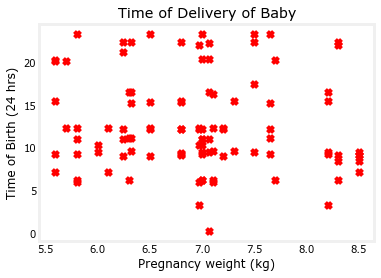

In [9]:
#data points plot
plt.scatter(x_train,y_train,marker='x',c='r')
#set title
plt.title("Time of Delivery of Baby")

#set the y-axis label
plt.ylabel("Time of Birth (24 hrs)")
#set the x-axis label
plt.xlabel("Pregnancy weight (kg)")
plt.show()

set our regression parameters, just testing if they fit
f=wx+b Univariate linear regression

In [16]:
w=0.02
b=8
print(f"w: {w}")
print(f"b: {b}")

w: 0.02
b: 8


Let us try the first crude model prediction

Parameters
w,b scalar
data m training examples
returns target values y

In [17]:
def compute_model_output(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)#initialize from 0 each example creating a zero column vector
    #for loop to compute action
    
    for i in range(m):
        f_wb[i]=w*x[i]+b
    
    return f_wb

After creating the model we feed it the data then visualize its performance with given params w,b

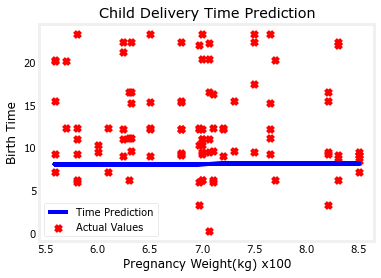

In [18]:
#feed the model
from cProfile import label


tmp_f_wb=compute_model_output(x_train,w,b)
#plot the model prediction
plt.plot(x_train,tmp_f_wb,c='b',label='Time Prediction')
#plot the data points 
plt.scatter(x_train,y_train,marker='x',c='r',label='Actual Values')
#set the title
plt.title('Child Delivery Time Prediction')
#set y-axis label
plt.ylabel('Birth Time')
#set x-axis label
plt.xlabel('Pregnancy Weight(kg) x100')
plt.legend()
plt.show()

DEVELOPING THE COST FUNCTION


In [19]:
%matplotlib widget
from lab_utils_uni import plt_intuition,plt_stationary,plt_update_onclick,soup_bowl

cost function

In [20]:
#cost function model
def compute_cost(x,y,w,b):
    #number of training example
    m=x.shape[0]
    cost_sum=0
    
    for i in range(m):
        f_wb=w*x[i]+b
        cost=(f_wb-y[i])**2
        cost_sum=cost_sum+cost
    
    total_cost=(1/(2*m))*cost_sum
    return total_cost

In [21]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

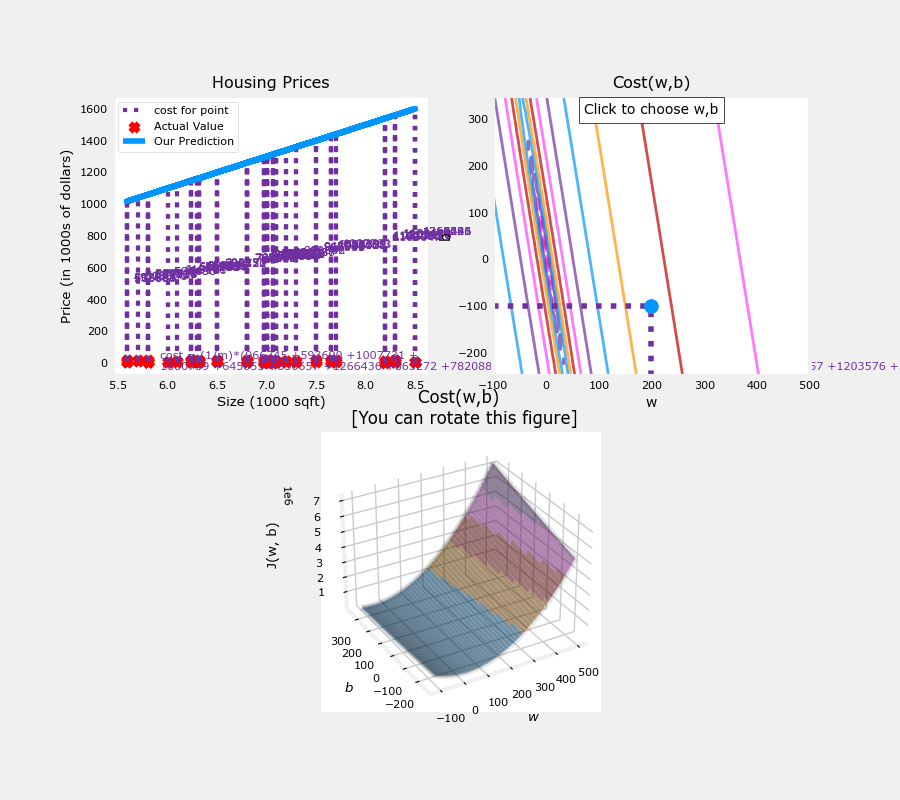

In [22]:
plt.close('all')
fig,ax,dyn_items=plt_stationary(x_train,y_train)
updater=plt_update_onclick(fig,ax,x_train,y_train,dyn_items)

In [ ]:
soup_bowl()

import new modules

In [23]:
#import math module
import math
import copy

In [24]:
from lab_utils_uni import plt_house_x,plt_contour_wgrad,plt_divergence,plt_gradients

compute GRADIENT FUNCTION

In [25]:
def gradient_function(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw_i=(f_wb-y[i])*x[i]
        dj_db_i=f_wb-y[i]
        
        dj_db+=dj_db_i
        dj_dw+=dj_dw_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw,dj_db

plot gradient

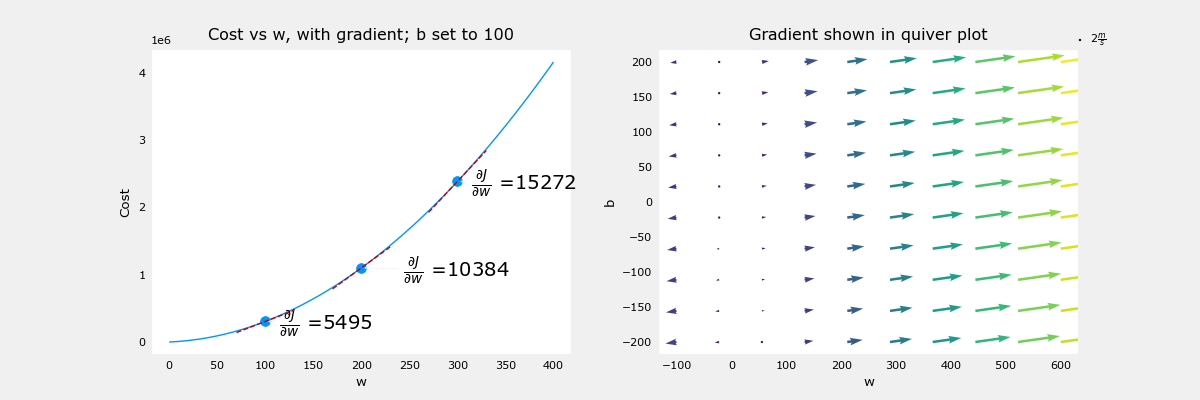

In [26]:
from lab_utils_common import compute_gradient


plt_gradients(x_train,y_train,compute_cost,gradient_function)
plt.show()

In [27]:
#calculate the GD
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,compute_cost,gradient_function):
    w=copy.deepcopy(w_in)
    J_history=[]
    p_history=[]
    
    b=b_in
    w=w_in
    
    for i in range(num_iters):
        dj_dw,dj_db=gradient_function(x,y,w,b)
        
        b=b-alpha*dj_db
        w=w-alpha*dj_dw
        
        if i<100000:
            J_history.append(compute_cost(x,y,w,b))
            p_history.append([w,b])
        
        #print cost every 10 times
        
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4}: Cost {J_history[-1]}", f"dj_dw: {dj_dw}, dj_db: {dj_db}", f"w:{w}, b:{b:0.5}")
    return w,b,J_history,p_history

In [28]:
w_init=0
b_init=0

iterations=100000
tmp_alpha=1.0e-3

#run GD
w_final,b_final,J_hist,p_hist=gradient_descent(x_train,y_train,w_init,b_init,tmp_alpha,iterations,compute_cost,gradient_function)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 88.82276456740226 dj_dw: -88.28055841584157, dj_db: -12.767524752475252 w:0.08828055841584156, b:0.012768
Iteration 10000: Cost 16.394089658235934 dj_dw: 0.027139109320001843, dj_db: -0.19096706248569878 w:1.4809476665044972, b:2.29
Iteration 20000: Cost 16.066116489355565 dj_dw: 0.02385836560061114, dj_db: -0.16788178052324293 w:1.226314079889527, b:4.0817
Iteration 30000: Cost 15.81264535183736 dj_dw: 0.02097421851321051, dj_db: -0.14758719050708402 w:1.0024621792239714, b:5.6569
Iteration 40000: Cost 15.61675244457883 dj_dw: 0.018438724999224866, dj_db: -0.12974593630044273 w:0.8056708835519207, b:7.0416
Iteration 50000: Cost 15.465358358885556 dj_dw: 0.016209737653995818, dj_db: -0.11406144346701202 w:0.6326689392434675, b:8.259
Iteration 60000: Cost 15.348354790437567 dj_dw: 0.014250204112400763, dj_db: -0.10027298932624835 w:0.4805805420798971, b:9.3292
Iteration 70000: Cost 15.257929626423559 dj_dw: 0.012527551128813586, dj_db: -0.08815136897096859 w:0.34687

In [29]:
#prediction 
#70kg prediction of time
res=(w_final*7.0+b_final)
m=(round((res-int(res))*60,0))/100
h=math.trunc(res)
time=m+h
if time>0.00 and time<12.00:
 print(f"70 kg time prediction: {time} am")
elif time>11.59 and time<23.59:
    print(f"70 kg time prediction: {time} pm")

70 kg time prediction: 12.43 pm


In [30]:
#prediction2
#55kg prediction of time
res=(w_final*5.5+b_final)
m=(round((res-int(res))*60,0))/100
h=math.trunc(res)
time=m+h
if time>0.00 and time<12.00:
 print(f"55 kg time prediction: {time} am")
elif time>11.59 and time<23.59:
    print(f"55 kg time prediction: {time} pm")

55 kg time prediction: 12.39 pm


# Current Cost Root

In [26]:
#get the current cost
print(f"Current Cost SQR. : {(compute_cost(x_train,y_train,w_final,b_final))**0.5:0.2f}")

Current Cost SQR. : 3.88
